<a href="https://colab.research.google.com/github/Affanamin/Data-Analysis/blob/master/PandemicInPakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In pakistan, We are facing lockdowns from our Govt and it is going to be more strict from Sindh governtmet especially. Lets start digging into Pakistan's COVID 19 data and clear our thoughts on:

Is it really a danger or we will away from this easily?

Wuhan, Italy, USA have faced alot because of this epidemic. Is there is any possibility that Pakistan will face these issues like Wuhan did ?

This Workbook ghas been divided into 2 sections:

Section 1: Analysis on Pakistan's different Region.
Section 2: Forecasting through Prophet model by Facebook.

Data: We got our data from 11 march 2020 till 20 april 2020.

In [0]:
# importing important libraries
import pandas as pd

# For Visualisation Purpose
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Reading Pakistan's COVID data
df= pd.read_excel('/content/COVID_Pak_finaldayData.xlsx')
df_pak = df.copy()
df.head(10)

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,1275.0,49.0,1275.0,2020-04-20,10.0,0.0,0.0,46.0,AJK,39.0,46.0
1,5,5793.0,432.0,5315.0,2020-04-20,152.0,5.0,207.0,308.0,Balochistan,68.0,230.0
2,6,2657.0,263.0,2430.0,2020-04-20,194.0,3.0,62.0,228.0,GB,4.0,261.0
3,7,5976.0,181.0,5976.0,2020-04-20,20.0,3.0,142.0,119.0,ICT,16.0,119.0
4,8,7090.0,1235.0,6544.0,2020-04-20,267.0,67.0,605.0,559.0,KP,296.0,541.0
5,9,34084.0,3721.0,58304.0,2020-04-20,702.0,42.0,1975.0,885.0,Punjab,1002.0,2156.0
6,10,24458.0,2537.0,24458.0,2020-04-20,625.0,56.0,1065.0,1520.0,Sindh,791.0,1520.0
7,11,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Removing Nan Values
df_Pak_All = df[0:7][:] 
df_Pak_All

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,1275.0,49.0,1275.0,2020-04-20,10.0,0.0,0.0,46.0,AJK,39.0,46.0
1,5,5793.0,432.0,5315.0,2020-04-20,152.0,5.0,207.0,308.0,Balochistan,68.0,230.0
2,6,2657.0,263.0,2430.0,2020-04-20,194.0,3.0,62.0,228.0,GB,4.0,261.0
3,7,5976.0,181.0,5976.0,2020-04-20,20.0,3.0,142.0,119.0,ICT,16.0,119.0
4,8,7090.0,1235.0,6544.0,2020-04-20,267.0,67.0,605.0,559.0,KP,296.0,541.0
5,9,34084.0,3721.0,58304.0,2020-04-20,702.0,42.0,1975.0,885.0,Punjab,1002.0,2156.0
6,10,24458.0,2537.0,24458.0,2020-04-20,625.0,56.0,1065.0,1520.0,Sindh,791.0,1520.0


In [0]:
df_Pak_All = df_Pak_All[['Date','Region','Cumulative  Test positive','Expired','Discharged','New  (last 24 hrs)']]

df_Pak_All.head(8)  #// 8 regions

,Date,Region,Cumulative Test positive,Expired,Discharged,New (last 24 hrs)
0,2020-04-20,AJK,49.0,0.0,10.0,46.0
1,2020-04-20,Balochistan,432.0,5.0,152.0,308.0
2,2020-04-20,GB,263.0,3.0,194.0,228.0
3,2020-04-20,ICT,181.0,3.0,20.0,119.0
4,2020-04-20,KP,1235.0,67.0,267.0,559.0
5,2020-04-20,Punjab,3721.0,42.0,702.0,885.0
6,2020-04-20,Sindh,2537.0,56.0,625.0,1520.0


In [0]:
total_cases = df_Pak_All['Cumulative  Test positive'].sum()
print('Total number of confirmed COVID 2019 cases across Pakistan till date (20 Aril, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across Pakistan till date (20 Aril, 2020): 8418.0


In [0]:
#Learn how to highlight your dataframe
df_Pak_All.style.background_gradient(cmap='Reds')

,Date,Region,Cumulative Test positive,Expired,Discharged,New (last 24 hrs)
0,2020-04-20 00:00:00,AJK,49.000000,0.000000,10.000000,46.000000
1,2020-04-20 00:00:00,Balochistan,432.000000,5.000000,152.000000,308.000000
2,2020-04-20 00:00:00,GB,263.000000,3.000000,194.000000,228.000000
3,2020-04-20 00:00:00,ICT,181.000000,3.000000,20.000000,119.000000
4,2020-04-20 00:00:00,KP,1235.000000,67.000000,267.000000,559.000000
5,2020-04-20 00:00:00,Punjab,3721.000000,42.000000,702.000000,885.000000
6,2020-04-20 00:00:00,Sindh,2537.000000,56.000000,625.000000,1520.000000


In [0]:
#Total Active  is the Total cases - (Number of death + Cured)
df_Pak_All['Total Active'] = df_Pak_All['Cumulative  Test positive'] - (df_Pak_All['Expired'] + df_Pak_All['Discharged'])
total_active = df_Pak_All['Total Active'].sum()
print('Total number of active COVID 2019 cases across Pakistan:', total_active)
Tot_Cases = df_Pak_All.groupby('Region')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across Pakistan: 6272.0


,Total Active
Region,
Punjab,2977.000000
Sindh,1856.000000
KP,901.000000
Balochistan,275.000000
ICT,158.000000
GB,66.000000
AJK,39.000000


In [0]:
df_full

,Region,Latitude,Longitude,Date,Cumulative Test positive,Expired,Discharged,New (last 24 hrs),Total Active
0,Punjab,30.1704,71.7097,2020-04-20,3721.0,42.0,702.0,885.0,2977.0
1,Sindh,24.8943,67.5247,2020-04-20,2537.0,56.0,625.0,1520.0,1856.0
2,KP,33.9526,71.3311,2020-04-20,1235.0,67.0,267.0,559.0,901.0
3,Balochistan,27.4907,64.0958,2020-04-20,432.0,5.0,152.0,308.0,275.0
4,ICT,32.7205,72.0405,2020-04-20,181.0,3.0,20.0,119.0,158.0
5,GB,34.8026,73.9832,2020-04-20,263.0,3.0,194.0,228.0,66.0
6,AJK,32.9259,72.7810,2020-04-20,49.0,0.0,10.0,46.0,39.0


In [0]:
# Learn how to use folium to create a zoomable map
# Coordinates of Pakistan States and Union Territories
Pak_coord = pd.read_excel('/content/Pak_coord.xlsx')

df_full = pd.merge(Pak_coord,df_Pak_All,on='Region')


In [0]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Active'], df_full['Region']):
    folium.CircleMarker([lat, lon], radius=value*0.02,color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

As We can see Sindh and Punjab are amongst the highly effected areas.

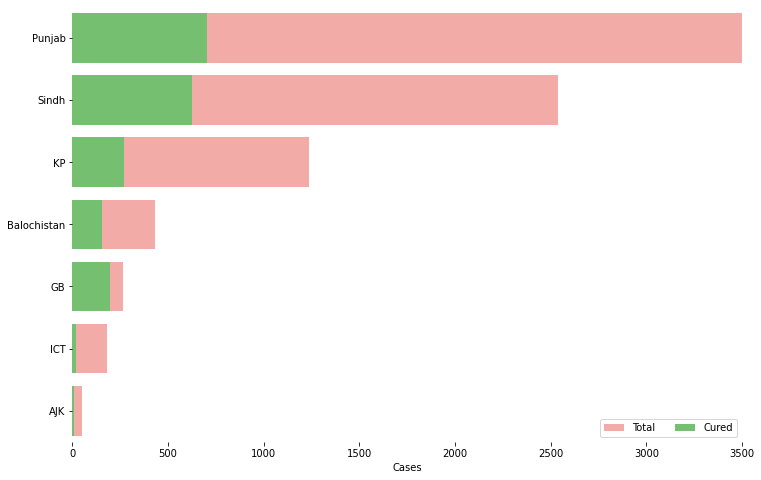

In [0]:
#Learn how to use Seaborn for visualization
#df_Pak_All
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Region','Cumulative  Test positive','Discharged','Expired']]
data.sort_values('Cumulative  Test positive',ascending=False,inplace=True)
data
sns.set_color_codes("pastel")
sns.barplot(x="Cumulative  Test positive", y="Region", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Discharged", y="Region", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3500), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

We need our data set in which we have all confirmed case values from all the regions of Pakistan, provided date, from 11 macrh to 20 april.


In [0]:
Pak_df_dayByDay= pd.read_excel('/content/COVID_FINAL_DATA.xlsx')
Pak_df_dayByDay.head(20)

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0
5,9,19,1,18,2020-03-11 00:00:00,0,0,NaN,4,Balochistan,1,4
6,10,3,0,4,2020-03-11 00:00:00,0,0,NaN,0,AJK,0,0
7,11,10,2,26,2020-03-11 00:00:00,0,0,NaN,0,GB,2,4
8,4,52,2,85,2020-03-12 00:00:00,0,0,NaN,4,ICT,2,5
9,5,67,0,105,2020-03-12 00:00:00,0,0,NaN,6,Punjab,0,10


In [0]:
temp_total_date_Sindh = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Sindh')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_Punjab = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Punjab')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_Balochistan = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Balochistan')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_ICT = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='ICT')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_KPK = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='KP')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_GB = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='GB')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_KPTD = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='KPTD')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})



Now Lets see how is the progression of COVID 19 amongst all Pakistani Cities. 

In [0]:
Sindh = [i for i in temp_total_date_Sindh["Cumulative  Test positive"]['sum'].values]
Sindh_60 = Sindh[0:60]

Punjab = [i for i in temp_total_date_Punjab["Cumulative  Test positive"]['sum'].values]
Punjab_60 = Punjab[0:60]

Balochistan = [i for i in temp_total_date_Balochistan["Cumulative  Test positive"]['sum'].values]
Balochistan_60 = Balochistan[0:60]

ICT = [i for i in temp_total_date_ICT["Cumulative  Test positive"]['sum'].values]
ICT_60 = ICT[0:60]

KPK = [i for i in temp_total_date_KPK["Cumulative  Test positive"]['sum'].values]
KPK_60 = KPK[0:60]

GB = [i for i in temp_total_date_GB["Cumulative  Test positive"]['sum'].values]
GB_60 = GB[0:60]



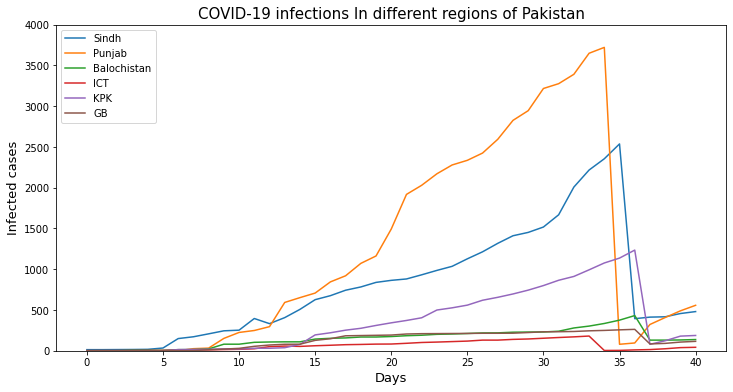

In [0]:
# Plots
plt.figure(figsize=(12,6))

plt.plot(Sindh_60)
plt.plot(Punjab_60)
plt.plot(Balochistan_60)
plt.plot(ICT_60)
plt.plot(KPK_60)
plt.plot(GB_60)

plt.legend(["Sindh","Punjab","Balochistan","ICT","KPK","GB"], loc='upper left')
plt.title("COVID-19 infections In different regions of Pakistan", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 4000)
plt.show()


Now we are going to compare Pakistan's graph with other most effected countries.

In [0]:
Final_Data_Pak = pd.read_excel('/content/Final_TotalData.xlsx')

In [0]:
Final_Data_Pak.head()

,Date,Prv_Sindh_ConfimedCases,Prv_Sindh_NewCases,Prv_Punjab_ConfimedCases,Prv_Punjab_NewCases,Prv_Balochistan_ConfimedCases,Prv_Balochistan_NewCases,Prv_ICT_ConfimedCases,Prv_ICT_NewCases,Prv_GB_ConfimedCases,Prv_GB_NewCases,Prv_KP_ConfimedCases,Prv_KP_NewCases
0,2020-03-11,14,1,0,6,1,4,2,3,2,0,0,0
1,2020-03-12,14,5,0,6,1,4,2,4,3,0,0,4
2,2020-03-13,15,18,0,4,1,8,2,5,3,7,0,3
3,2020-03-14,16,12,0,6,6,14,3,5,3,6,0,2
4,2020-03-15,18,8,0,6,6,0,4,3,3,0,0,1


In [0]:
Final_Data_Pak['ConfirmedCasesInPakistan'] = Final_Data_Pak['Prv_Sindh_ConfimedCases'] + Final_Data_Pak['Prv_Punjab_ConfimedCases'] + Final_Data_Pak['Prv_Balochistan_ConfimedCases'] + Final_Data_Pak['Prv_ICT_ConfimedCases']+Final_Data_Pak['Prv_GB_ConfimedCases']+Final_Data_Pak['Prv_KP_ConfimedCases']

In [0]:
Final_Data_Pak.head()

,Date,Prv_Sindh_ConfimedCases,Prv_Sindh_NewCases,Prv_Punjab_ConfimedCases,Prv_Punjab_NewCases,Prv_Balochistan_ConfimedCases,Prv_Balochistan_NewCases,Prv_ICT_ConfimedCases,Prv_ICT_NewCases,Prv_GB_ConfimedCases,Prv_GB_NewCases,Prv_KP_ConfimedCases,Prv_KP_NewCases,ConfirmedCasesInPakistan
0,2020-03-11,14,1,0,6,1,4,2,3,2,0,0,0,19
1,2020-03-12,14,5,0,6,1,4,2,4,3,0,0,4,20
2,2020-03-13,15,18,0,4,1,8,2,5,3,7,0,3,21
3,2020-03-14,16,12,0,6,6,14,3,5,3,6,0,2,28
4,2020-03-15,18,8,0,6,6,0,4,3,3,0,0,1,31


In [0]:
Final_Data_Pak['NewCasesInPakistan'] = Final_Data_Pak['Prv_Sindh_NewCases'] + Final_Data_Pak['Prv_Punjab_NewCases'] + Final_Data_Pak['Prv_Balochistan_NewCases'] + Final_Data_Pak['Prv_ICT_NewCases']+Final_Data_Pak['Prv_GB_NewCases']+Final_Data_Pak['Prv_KP_NewCases']

In [0]:
Final_Data_Pak.tail()

,Date,Prv_Sindh_ConfimedCases,Prv_Sindh_NewCases,Prv_Punjab_ConfimedCases,Prv_Punjab_NewCases,Prv_Balochistan_ConfimedCases,Prv_Balochistan_NewCases,Prv_ICT_ConfimedCases,Prv_ICT_NewCases,Prv_GB_ConfimedCases,Prv_GB_NewCases,Prv_KP_ConfimedCases,Prv_KP_NewCases,ConfirmedCasesInPakistan,NewCasesInPakistan
35,2020-03-24,394,0,96,14,432,308,11,34,263,228,1235,559,2431,1143
36,2020-03-26,413,37,323,0,131,0,15,10,84,0,80,138,1046,185
37,2020-03-27,417,416,408,741,131,57,25,151,91,430,123,10,1195,1805
38,2020-03-28,457,351,490,210,133,22,39,198,107,45,180,104,1406,930
39,2020-03-29,481,515,558,182,138,136,43,157,116,1,188,108,1524,1099


In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [0]:

Final_Data_Pak['Date'] =pd.to_datetime(Final_Data_Pak.Date)
#Final_Data_Pak.sort('Date') # This now sorts in date order

In [0]:
#Final_Data_Pak.sort('Date') # This now sorts in date order
Final_Data_Pak['Date'] = Final_Data_Pak.sort_values(by='Date')

In [0]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=Final_Data_Pak['Date'].head(35), y = Final_Data_Pak['ConfirmedCasesInPakistan'].head(35), mode='lines+markers',name='ConfirmedCasesInPakistan'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Pakistan (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in Pakistan

import plotly.express as px
fig = px.bar(Final_Data_Pak, x="Date", y="NewCasesInPakistan", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Pakistan on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [0]:
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?

In [0]:
# import plotly.express as px
fig = px.bar(Final_Data_Pak, x="Date", y="ConfirmedCasesInPakistan", color='ConfirmedCasesInPakistan', orientation='v', height=600,
             title='Confirmed Cases in Pakistan', color_discrete_sequence = px.colors.cyclical.IceFire)
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=Final_Data_Pak['Date'].head(35), y = Final_Data_Pak['ConfirmedCasesInPakistan'].head(35), mode='lines+markers',name='ConfirmedCasesInPakistan'))


'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "Pakistan","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=Final_Data_Pak['Date'], y=Final_Data_Pak['ConfirmedCasesInPakistan'],
                    marker=dict(color=Final_Data_Pak['ConfirmedCasesInPakistan'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Section II: Forecasting ::

In [0]:
#Forecasting Through Prophet
from fbprophet import Prophet


In [0]:
confirmed_cases = Final_Data_Pak.groupby('Date').sum()['ConfirmedCasesInPakistan'].reset_index()
#deaths = df.groupby('Date').sum()['Deaths'].reset_index()
#recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
confirmed_cases.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_cases['ds'] = pd.to_datetime(confirmed_cases['ds'])

In [0]:
confirmed_cases.tail()

,ds,y
35,2020-04-15,6153
36,2020-04-16,6446
37,2020-04-17,6999
38,2020-04-18,7588
39,2020-04-19,7742


In [0]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_cases)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
42,2020-04-22
43,2020-04-23
44,2020-04-24
45,2020-04-25
46,2020-04-26


In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
42,2020-04-22,8350.169301,7816.282913,8842.610205
43,2020-04-23,8539.894982,8056.703821,9064.601047
44,2020-04-24,8862.173230,8323.264500,9376.804372
45,2020-04-25,9181.927821,8690.365674,9698.206201
46,2020-04-26,9479.480958,8942.543020,10040.798409


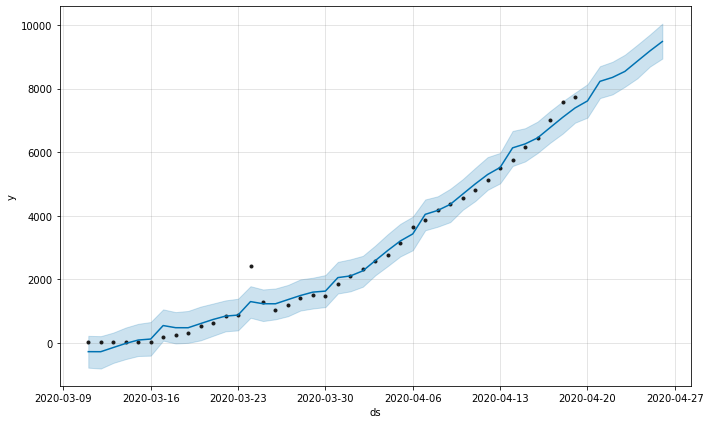

In [0]:
confirmed_forecast_plot = m.plot(forecast)

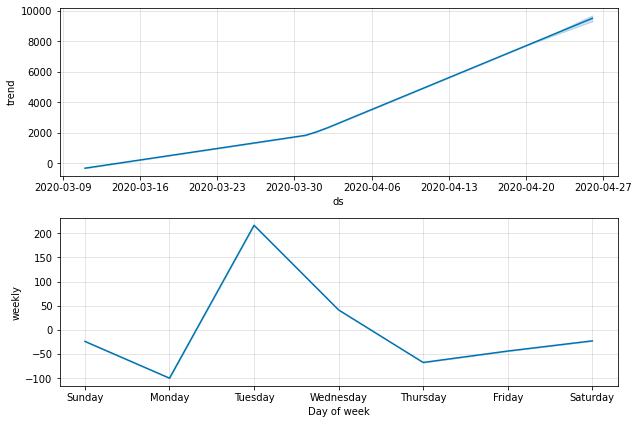

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)

According to the model, We can predict that corona cases in Pakistan will cross 10,000 in this week (On 26th of april). Stay safe, and keep social distancing 